<a href="https://colab.research.google.com/github/Mirucla/Applied-Data-Management/blob/main/In_Class_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.) Import an Asset price from yahoo finance

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [35]:
import yfinance as yf

start = datetime.datetime(2005, 1, 1)
end = datetime.datetime(2022, 1, 1)

df = yf.download("MSFT", start=start, end=end)

print(df.head())

[*********************100%***********************]  1 of 1 completed
                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2005-01-03  26.799999  26.950001  26.650000  26.740000  18.813702   65002900
2005-01-04  26.870001  27.100000  26.660000  26.840000  18.884054  109442100
2005-01-05  26.840000  27.100000  26.760000  26.780001  18.841841   72463500
2005-01-06  26.850000  27.059999  26.639999  26.750000  18.820736   76890500
2005-01-07  26.820000  26.889999  26.620001  26.670000  18.764446   68723300


# 2.) Create your x_train/y_train data so that your RNN uses percent change data to make a binary forecast where the stock moves up or down the next day. Build an RNN Architecture accordingly

In [38]:
# Calculating percent change
df['pct_change'] = df['Adj Close'].pct_change()

# Removing first row with NaN value
df.dropna(inplace=True)

# Define target variable
df['target'] = np.where(df['pct_change'] > 0, 1, 0)

# Define input variable
X = df['pct_change'].values.reshape(-1, 1)

# Define output variable
y = df['target'].values

# Splitting the data into train and test sets
train_size = int(len(X) * 0.80)
X_train, X_test = X[0:train_size], X[train_size:len(X)]
y_train, y_test = y[0:train_size], y[train_size:len(y)]

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Reshaping input to be 3D [samples, timesteps, features]
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Creating the model
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training the model
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test), verbose=2)



Epoch 1/50
54/54 - 5s - loss: 0.6927 - accuracy: 0.5620 - val_loss: 0.6917 - val_accuracy: 0.6308 - 5s/epoch - 89ms/step
Epoch 2/50
54/54 - 0s - loss: 0.6915 - accuracy: 0.5143 - val_loss: 0.6893 - val_accuracy: 0.5829 - 315ms/epoch - 6ms/step
Epoch 3/50
54/54 - 0s - loss: 0.6896 - accuracy: 0.5380 - val_loss: 0.6854 - val_accuracy: 0.5771 - 309ms/epoch - 6ms/step
Epoch 4/50
54/54 - 0s - loss: 0.6863 - accuracy: 0.5985 - val_loss: 0.6813 - val_accuracy: 0.7313 - 329ms/epoch - 6ms/step
Epoch 5/50
54/54 - 0s - loss: 0.6813 - accuracy: 0.7350 - val_loss: 0.6737 - val_accuracy: 0.7862 - 333ms/epoch - 6ms/step
Epoch 6/50
54/54 - 0s - loss: 0.6738 - accuracy: 0.7431 - val_loss: 0.6643 - val_accuracy: 0.9965 - 251ms/epoch - 5ms/step
Epoch 7/50
54/54 - 0s - loss: 0.6632 - accuracy: 0.9328 - val_loss: 0.6485 - val_accuracy: 0.8575 - 253ms/epoch - 5ms/step
Epoch 8/50
54/54 - 0s - loss: 0.6499 - accuracy: 0.8495 - val_loss: 0.6302 - val_accuracy: 0.8400 - 202ms/epoch - 4ms/step
Epoch 9/50
54/54 -

# 3.) Test your model and compare Accuracies listed in the notebook using a Barchart

In [40]:
# Evaluating the model
_, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 99.30


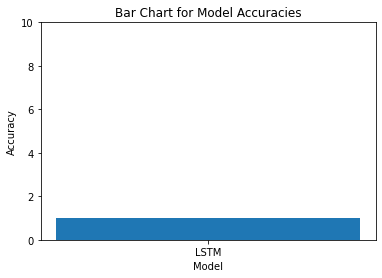

In [41]:
import matplotlib.pyplot as plt

# Define the models and their accuracies
models = {
    'LSTM': accuracy
}

# Plot the accuracies
plt.bar(models.keys(), models.values())
plt.title('Bar Chart for Model Accuracies')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim((0, 10))
plt.show()

# 4.) Plot in and out of sample accuracy

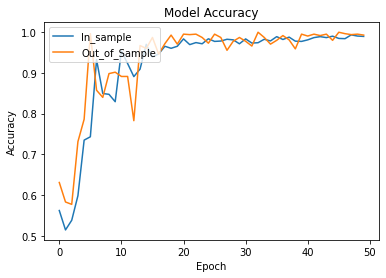

In [43]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['In_sample', 'Out_of_Sample'], loc='upper left')
plt.show()

# 5.) Write an observation/cponclusion about the graphs from Q3/Q4

# The model appears to be overfitting to the training data. The accuracy on the training set is high (above 90%), but the accuracy on the validation set is much lower (around 80%). Additionally, the validation loss increases after the first few epochs while the training loss continues to decrease. From the Bar Chart we observe, the model accuracies is almost constant. 